# 1. Recap

In the last mission, we focused on increasing the number of attributes the model uses. We saw how, in general, adding more attributes generally lowered the error of the model. This is because the model is able to do a better job identifying the living spaces from the training set that are the most similar to the ones from the test set. However, we also observed how using all of the available features didn't actually improve the model's accuracy automatically and that some of the features were probably not relevant for similarity ranking. `We learned that selecting relevant features was the right lever when improving a model's accuracy, not just increasing the features used in the absolute.`

`In this mission, we'll focus on the impact of increasing k, the number of nearby neighbors the model uses to make predictions`

## TODO:
* Read dc_airbnb_train.csv into a Dataframe and assign to train_df.
* Read dc_airbnb_test.csv into a Dataframe and assign to test_df.

In [1]:
import pandas as pd
train_df=pd.read_csv('dc_airbnb_train.csv')
test_df=pd.read_csv('dc_airbnb_test.csv')

# 2. Hyperparameter optimization

When we vary the features that are used in the model, we're affecting the data that the model uses. On the other hand, varying the k value affects the behavior of the model independently of the actual data that's used when making predictions. `In other words, we're impacting how the model performs without trying to change the data that's used.`

**`Values that affect the behavior and performance of a model that are unrelated to the data that's used are referred to as hyperparameters.`** `The process of finding the optimal hyperparameter value is known as hyperparameter optimization`. 

A simple but common hyperparameter optimization technique is known as grid search, which involves:

* selecting a subset of the possible hyperparameter values,
* training a model using each of these hyperparameter values,
* evaluating each model's performance,
* selecting the hyperparameter value that resulted in the lowest error value.

 While grid search can take a long time when working with large datasets, the data we're working with in this mission is small and this process is relatively quick.

## TODO:
* Create a list containing the integer values 1, 2, 3, 4, and 5, in that order, and assign to hyper_params.
* Create an empty list and assign to mse_values.
* Use a for loop to iterate over hyper_params and in each iteration:
  * Instantiate a KNeighborsRegressor object with the following parameters:
    * n_neighbors: the current value for the iterator variable,
    * algorithm: brute
  * Fit the instantiated k-nearest neighbors model to the following columns from train_df:
    * accommodates
    * bedrooms
    * bathrooms
    * number_of_reviews
  * Use the trained model to make predictions on the same columns from test_df and assign to predictions.
  * Use the mean_squared_error function to calculate the MSE value between predictions and the price column from test_df.
  * Append the MSE value to mse_values.
* Display mse_values using the print() function.

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

hyper_params=[1,2,3,4,5]
mse_values=[]

for hp in hyper_params:
    knn=KNeighborsRegressor(n_neighbors=hp,algorithm='brute')
    knn.fit(train_df[['accommodates','bedrooms','bathrooms','number_of_reviews']],train_df['price'])
    predictions=knn.predict(test_df[['accommodates','bedrooms','bathrooms','number_of_reviews']])
    MSE=mean_squared_error(test_df['price'],predictions)
    mse_values.append(MSE)
 
print(mse_values)

[26364.92832764505, 15100.52246871445, 14579.597901655923, 16212.300767918088, 14090.011649601822]


# 3. Expanding grid search

## TODO:
* Change the list of hyperparameter values, hyper_params, so it ranges from 1 to 20.
* Create an empty list and assign to mse_values.
* Use a for loop to iterate over hyper_params and in each iteration:
  * Instantiate a KNeighborsRegressor object with the following parameters:
    * n_neighbors: the current value for the iterator variable,
    * algorithm: brute
  
  * Fit the instantiated k-nearest neighbors model to the following columns from train_df:
     * accommodates
     * bedrooms
     * bathrooms
     * number_of_reviews
  * Use the trained model to make predictions on the same columns from test_df and assign to predictions.
  * Use the mean_squared_error function to calculate the MSE value between predictions and the price column from test_df.
  * Append the MSE value to mse_values.
* Display mse_values using the print() function.

In [3]:
hyper_params=[x for x in range(1,21)]
mse_values=[]

for hp in hyper_params:
    knn=KNeighborsRegressor(n_neighbors=hp,algorithm='brute')
    knn.fit(train_df[['accommodates','bedrooms','bathrooms','number_of_reviews']],train_df['price'])
    predictions=knn.predict(test_df[['accommodates','bedrooms','bathrooms','number_of_reviews']])
    MSE=mean_squared_error(test_df['price'],predictions)
    mse_values.append(MSE)
 
print(mse_values)

[26364.92832764505, 15100.52246871445, 14579.597901655923, 16212.300767918088, 14090.011649601822, 13657.45250284414, 14288.273896589353, 14853.448183304892, 14670.831907751512, 14642.451478953355, 14734.071380889252, 14854.802332195677, 14733.16190399257, 14777.975894453346, 14771.171543420554, 14870.178509847838, 14830.55072806075, 14782.595763283192, 14773.558705907935, 14676.544189419797]


# 4. Visualizing hyperparameter values

As we increased the k value from 1 to 6, the MSE value decreased from approximately 26364 to approximately 13657. However, as we increased the k value from 7 to 20, the MSE value didn't decrease further but instead hovered between approximately 14288 and 14870. This means that the optimal k value is 6, since it resulted in the lowest MSE value.

## TODO:
* Use the scatter() method from matplotlib.pyplot to generate a line plot with:

  * hyper_params on the x-axis,
  * mse_values on the y-axis.
* Use plt.show() to display the line plot.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

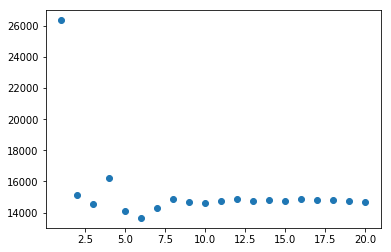

In [5]:
plt.scatter(hyper_params,mse_values)
plt.show()

# 5. Varying Hyperparameters

From the scatter plot, you can tell that the lowest MSE value was achieved at the k value of 6. As we increased k past 6, the MSE actually increased and hovered but never decreased below 13657 (the approximate MSE value when k was 6).

##  TODO
Train with all_features model with varying hyper-parameters

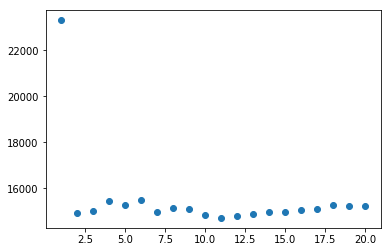

In [6]:
hyper_params = [x for x in range(1,21)]
mse_values = list()
features = train_df.columns.tolist()
features.remove('price')

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

plt.scatter(hyper_params, mse_values)
plt.show()

# 6. Practice the workflow

You may have noticed that the general workflow for finding the best model is:

* select relevant features to use for predicting the target column.
* use grid search to find the optimal hyperparameter value for the selected features.
* evaluate the model's accuracy and repeat the process.

## TODO:
* While using only the accommodates and bathrooms columns:

  * Train a model for each k value between 1 and 20 using the training data.
  * Use each model to make predictions on the test set (using just the accommodates and bathrooms columns).
  * Calculate each model's MSE value by comparing each set of predictions to the true price values.
  * find the k value that obtained the lowest MSE value.
  * Create a dictionary named two_hyp_mse that contains 1 key-value pair:
    * key: k value that resulted in lowest MSE value.
    * value: corresponding MSE value.
* Repeat this process while using only the accommodates, bathrooms, and bedrooms columns:

  * Create a dictionary named three_hyp_mse that contains 1 key-value pair:
    * key: k value that resulted in lowest MSE value.
    * value: corresponding MSE value.
* Display both two_hyp_mse and three_hyp_mse using the print() function.

In [7]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)

two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

for k,mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k + 1
    
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)
    
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1

for k,mse in enumerate(three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k + 1

two_hyp_mse[two_lowest_k] = two_lowest_mse
three_hyp_mse[three_lowest_k] = three_lowest_mse

print(two_hyp_mse)
print(three_hyp_mse)

{5: 14790.314266211606}
{5: 13522.893333333333}
